# **Scikit-learn 패키지 다루기 - 2**

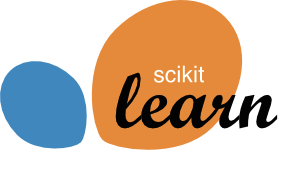

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### 1. 지난 시간 리뷰
앞서 Scikit-learn 패키지 다루기 -1 에서는 1) `Fashion MNIST` 데이터를 불러오고 2) 이를 전처리한 후 3) 시각화하는 방법을 배웠습니다.  
이번에는 전처리한 데이터를 이용해서 모델을 훈련하고 결과를 시각화하는 방법을 배워보겠습니다.  
먼저 지난 시간에 전처리한 데이터를 불러와볼까요? 아래 코드를 실행해주세요.

In [ ]:
file_path = "./fashionMNIST.csv"
data = pd.read_csv(file_path)

data = data[:30000] # 성능 이슈로 30000개의 데이터만 훈련에 사용됩니댜.

# 1. 주어진 데이터를 x와 y로 나눕니다.
x_data = data.drop(["id", "Category"], axis=1)
y_data = pd.DataFrame(data["Category"])

test_ratio = 0.2 # 총 데이터의 20%를 검증 데이터로 설정

# 2. 데이터를 train과 validation set으로 나누었습니다.
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size = test_ratio)

x_mean =  np.mean(x_train.values)
x_std = np.std(x_train.values)

# 3. 데이터를 정규화시켜줍니다. validation set(검증 데이터)을 정규화 할때도 train set(학습 데이터)의 분산과 평균을 사용합니다.
x_train = (x_train - x_mean) / x_std
x_val = (x_val - x_mean) / x_std

print(x_train,x_val)

### 2. Logistic regression에 대해 배워보기


#### 2.1. 이진분류에 쓰이는 Logistic regression

우리는 이제 전처리된 데이터에 logistic regression이라는 모델을 적용해볼겁니다. 먼저 코드를 짜기 전에 logistic regression이 무엇인지 알아보겠습니다.  
가장 기본적인 logistic regression은 데이터의 라벨이 0 혹은 1로 두가지인 경우입니다. 1차원 데이터 x와 이진 라벨 y로 구성된 데이터가 다음과 같이 구성되어있다고 가정해봅시다.  
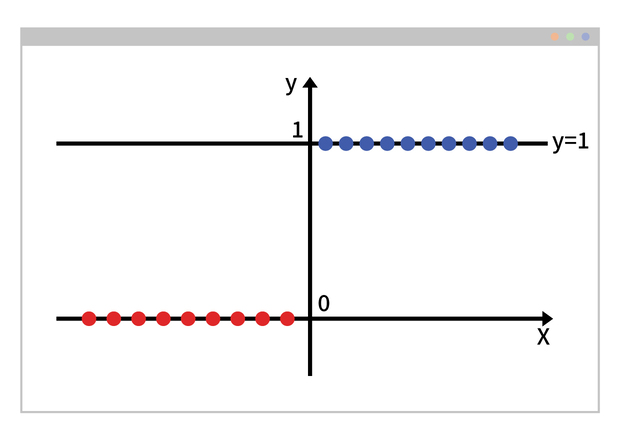  
이 경우에는 어떻게 분류할까요? 선형회귀를 적용한다면 어떨까요?  
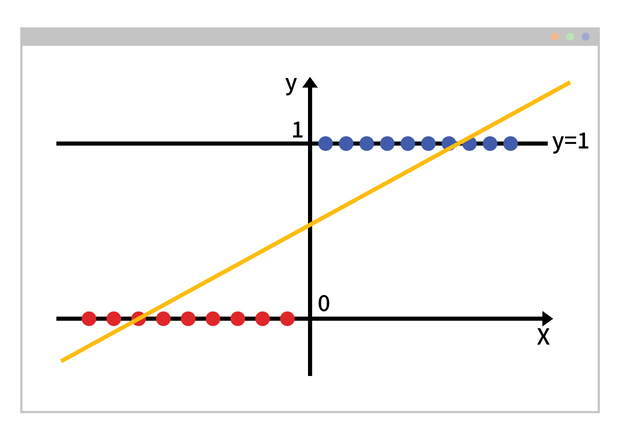  
x가 낮으면 y가 낮고, x가 높으면 y가 높다는 식으로 분석할 수 있습니다. 그런데 회귀선을 자세히 보면, y값은 0과 1밖에 없는데 확률은 무한대로 뻗어나갑니다.     
이는 불필요한 분석입니다. 우리는 y값을 0과 1로 예측하길 원했지만, 정작 예측값은 0과 1을 벗어납니다. 만약 우리가 데이터 라벨이 0과 1밖에 없다는 사실을 알고 있다면, 우리는 logistic regression을 적용할 수 있습니다. logistic regression은 다음처럼 y값을 0과 1 사이로 통일할 수 있습니다.  
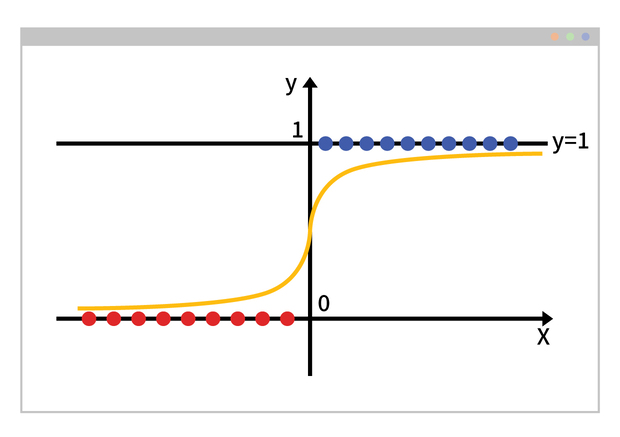  

Logistic regression은 다음과 같은 식으로 선언됩니다! 단, 이 식은 고등학교 과정을 벗어나기 때문에 이런 방법이 있다는 것만 알아주세요!   
$p(x)=\frac{1}{1+e^{-(x-\mu)}}$  


#### 2.2. 다중분류에 쓰이는 Logistic regression


앞서 이진분류에 쓰이는 Logistic regression을 알아봤습니다. 하지만 문제에 두 종류의 라벨뿐만 아니라 여러 종류의 라벨이 있다면 어떨까요?  
이 경우에 logistic regression은 어떻게 사용할까요? 먼저 2차원 데이터 x와 2개의 라벨을 가진 경우를 가정해보겠습니다. 아래 그림에서 수직축이 y가 아니라 x2임을 주의하며 봐주세요.   
기존의 이진분류를 하려면 그저 하나의 선만 그으면 됐어요. 이렇게요!  
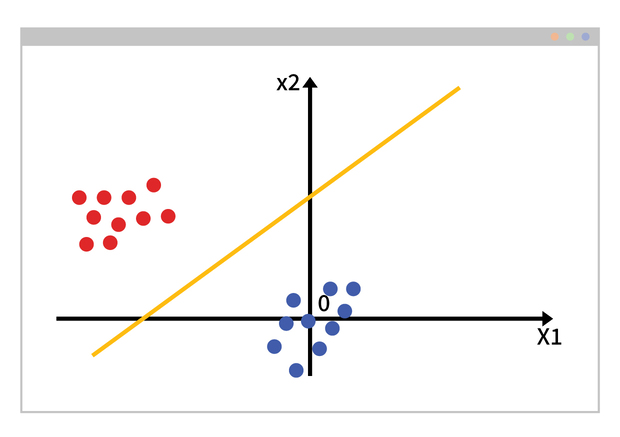  

하지만 여기서 라벨이 하나 더 추가된다면 어떨까요?  
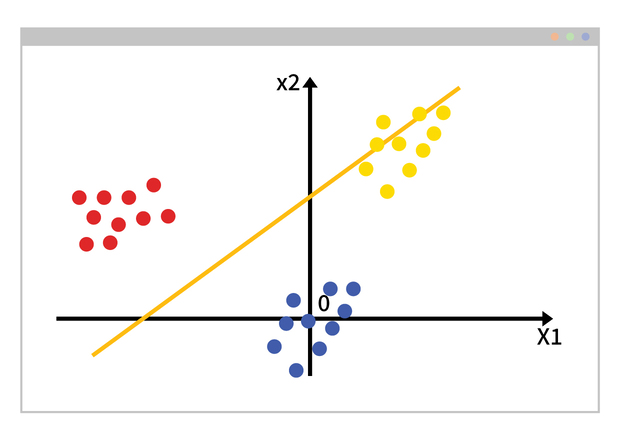  

주황색 구분선은 파란색과 빨간색 점을 구분해주지만, 노란색 점을 구분해주진 못합니다.  
이때는 선을 2개 더 그어주면 구분해줄 수 있습니다.  하나의 구분선 당 하나의 클래스를 구분해주는 겁니다.    

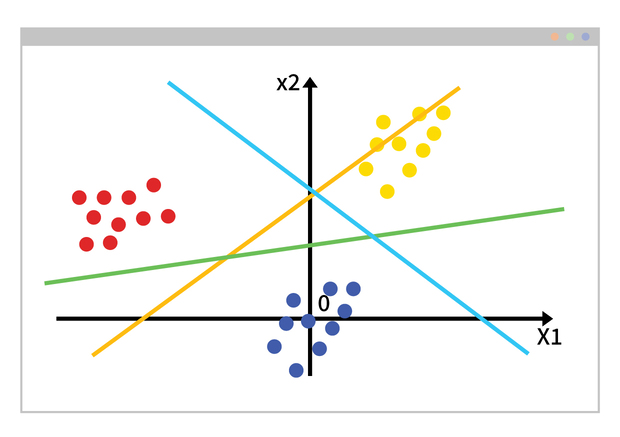  

하늘색 선은 노란색과 나머지를, 주황색 선은 빨간색과 나머지를, 연두색 선은 파란색과 나머지를 구분해줍니다. 이렇게 되면 클래스가 늘어날때마다 그만큼의 구분선을 그어주면 됩니다.
이러한 여러개의 이진 분류기로 클래스를 구분하는 방법을 OVR(One-vs-Rest) method라고 해요.

#### 2.3. Logisitc regression `Scikit-learn`으로 학습하기

`Scikit-learn`의 Logistic regression에는 ovr method를 간편하게 사용할 수 있도록 구현되어있어요. 다음의 코드면 돼요. 간단하죠?  
* 만약 데이터를 어떻게 전처리했는지 까먹었다면 앞의 내용을 보고 와주세요
* 학습에는 시간이 조금 오래걸려요 (코들 기준 약 5분 정도). 코드 옆에 있는 `*` 기호가 사라질때까지 조금 기다려주세요.
사용되는 코드는 다음과 같아요.
* `lg = LogisticRegression(solver='liblinear')`: 문제풀이에 쓰일 모델을 반환해줘요
* `lg.fit(x_train, y_train)`: x와 y를 사용해서 모델을 훈련시켜요.

In [ ]:
lg = LogisticRegression(solver='liblinear')
lg.fit(x_train, y_train)
print("end")

### 3. 모델 평가하기

#### 3.1. 정확도(accuracy)란?

우리는 모델이 예측한 정답을 정확도(accuracy)라는 지표를 사용해 평가할겁니다. 정답이 예측한 값과 얼마나 동일한지를 나타낼 수 있는 지표입니다.   
정확도는 다음과 같이 측정합니다.  

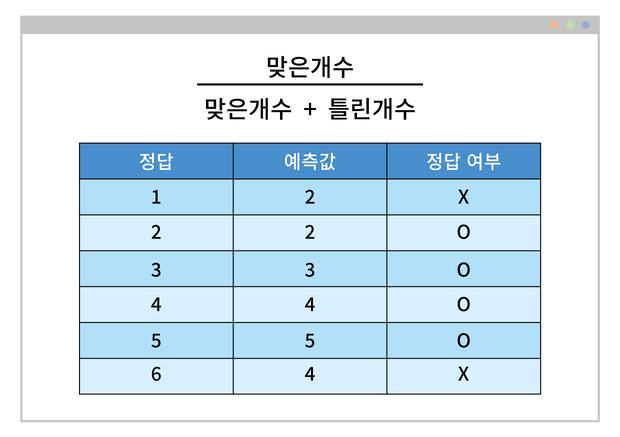  
위의 경우, 답인 경우가 4가지, 틀린 경우가 2가지이므로 정확도는 $\frac{4}{2 + 4} = 0.666...$입니다.

#### 3.2. Train과 Validation set에 대해 평가하기

앞서 훈련한 모델을 validation set을 사용해서 평가하기 위해서는 다음처럼 구현해야 합니다.  
* `lg.predict(x)`: `lg`는 앞서 훈련한 모델이에요. 데이터를 입력으로 받으면 모델의 예측값을 반환합니다.
* `accuracy_score(y, y_pred)`: 실제 y값과 예측한 y_pred 값을 받아 정확도를 반환해줍니다.
    * `y`와 `y_pred`는 같은 길이의 1차원 numpy array여야 해요. 만약 dataframe 형식이었다면 아래의 함수를 사용해서 변환해줍니다.
    * `y.values[:, 0].astype(int)`: pandas의 dataframe 형식의 라벨을 numpy 형식으로 바꿔줍니다.

In [ ]:
y_train_prd = lg.predict(x_train)
y_val_prd = lg.predict(x_val)

acc_train = accuracy_score(y_train, y_train_prd)
acc_val = accuracy_score(y_val.values[:, 0].astype(int), y_val_prd)

print("accuracy on train set", acc_train)
print("accuracy on validation set", acc_val)


#### 3.3. 클래스 별 성능 평가해보기

훈련된 모델이 train과 validation set에서 잘 작동하나요? 우리가 훈련한 모델은 어느 클래스를 특히 잘 맞출까요?  
보통 다중분류를 평가할때는 어떤 클래스를 잘 분류하는지 알아보기 위해서 클래스 별로 평가가 이루어집니다.  
어떤 클래스를 다른 클래스로 오해하지는 않았는지, 특정 클래스를 잘 맞추는지 등 더 자세한 평가 지표를 얻을 수 있습니다.  

이러한 실제 클래스와 예측한 클래스 별로 얼마나 차이가 나는지 알 수 있는 표를 **Confusion Matrix**라고 합니다. Confusion Matrix를 해석하는 방법은 아래와 같습니다.

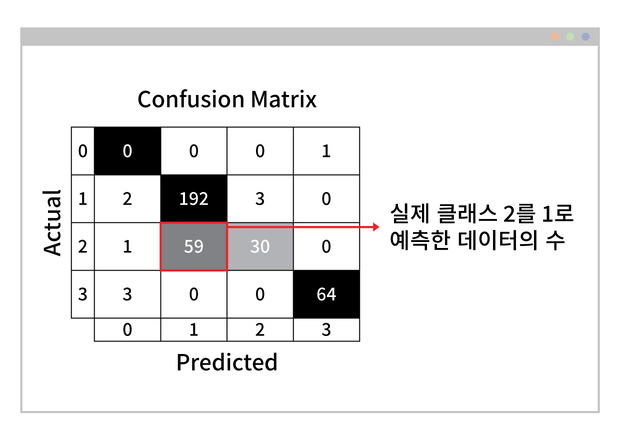

각 행과 열로 클래스가 구분되고 한 축은 실제 클래스를, 나머지 축은 예측된 클래스를 나타냅니다.  
예를 들어, 그림의 빨간색 원에 있는 59라는 숫자는 실제 클래스 2를 1로 예측한 데이터의 수 입니다.  
이로부터 알 수 있는 정보는 실제 클래스 2는 2로 예측되기 보다는 1로 예측이 많이 된다는 것입니다.  \
이를 통해 기존에 데이터 전처리 혹은 모델 훈련 기법을 수정해서 모델 성능 향상의 근거를 찾아낼 수 있겠죠?  

<i>(아래 코드는 참고만 해주세요. 예제로 풀지 않아도 됩니다.)</i>

In [ ]:
con_matrix = pd.crosstab(pd.Series(y_val['Category'].to_numpy(), name='Actual'), pd.Series(y_val_prd, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Logistic Regression")
sns.heatmap(con_matrix, cmap="Greys", annot=True, fmt='g')
plt.show()

#### 3.4. Test set에 대해 예측하기
Validation set이 Test set에서 어떻게 작동할지를 미리 예측하는 역할이라는 내용이 기억나시나요? 이번에는 test set에 대해 얼마의 정확도를 예측하는지 파악해볼까요?   이번에는 직접 전처리부터 모델 실행까지 구현해보겠습니다. 다음을 지키며 코드를 작성해주세요.
* Test data를 Train data의 평균과 분산으로 표준화를 시켜주세요.
* test data에 대한 예측 값과 실제 값을 사용해서 정확도를 구해주세요.

* 이때까지 나온 함수만을 사용해보세요.

In [ ]:
file_path = "./fashionMNIST_Testdata.csv"
test_data = pd.read_csv(file_path)
test_data
x_test = data.drop(["id", "Category"], axis=1)
y_test = pd.DataFrame(data["Category"])

x_test = (x_test - x_mean) / x_std # 표준화
y_test_prd = lg.predict(x_test) # 훈련한 모델로 예측

# todo - 테스트 데이터 category
acc_test = accuracy_score(y_test.values[:, 0].astype(int), y_test_prd)

print("accuracy on test set", acc_test)

#### 3.5. 예측한 값 시각화하기
우리가 구현한 모델이 잘 예측했는지 직접 시각화를 해볼까요?

<i>(아래 코드는 참고만 해주세요. 예제로 풀지 않아도 됩니다.)</i>

In [ ]:
# 이 부분은 자세하게 다루는 것보다 빠르게 데이터 구성만 보는 것이 목적이므로 따로 예제로 하지 않았습니다.

rows = 3
cols = 3

categoryMap = {
    0 :'T-shirt/Top',
    1 :'Trouser',
    2 :'Pullover',
    3 :'Dress',
    4 :'Coat',
    5 :'Sandal',
    6 :'Shirt',
    7 :'Sneaker',
    8 :'Bag',
    9 :'Ankle boot'
}


# 여러 그래프를 한번에 그리기
# subplots는 rows, cols를 통해서 한번에 여러 figure를 그릴 수 있도록 해줍니다.
fig, axes = plt.subplots(rows, cols, figsize=(12,12))

for i in range(rows):
    for j in range(cols):
        axes[i, j].imshow(x_test.values.reshape((x_test.shape[0], 28, 28))[i*cols+j], cmap=plt.get_cmap('gray'))
        axes[i, j].set_title("predict: " + str(categoryMap[y_test_prd[i*cols+j]]) + " / answer: " + str(categoryMap[y_test.values[:, 0].astype(int)[i*cols+j]]))
plt.show()

### 4. 마무리

이번에는 기초적이고 logistic regression이라는 모델로 이미지 데이터를 처리해봤습니다.  
이미지의 픽셀 데이터로부터 다중 분류를 하는 방법은 logistic regression만 있는게 아닙니다.  
이후 CNN이라는 인공신경망 기술이 만들어져 이미지 분류의 패러다임을 바꿔놓았답니다.  
이미지 분석을 잘 하면 아래처럼 흥미로운 기술들을 구현할 수 있습니다.  

* 객체인식: 화면에 어떤 사물이 어떤 위치에 있는지를 인식하는 문제입니다.

    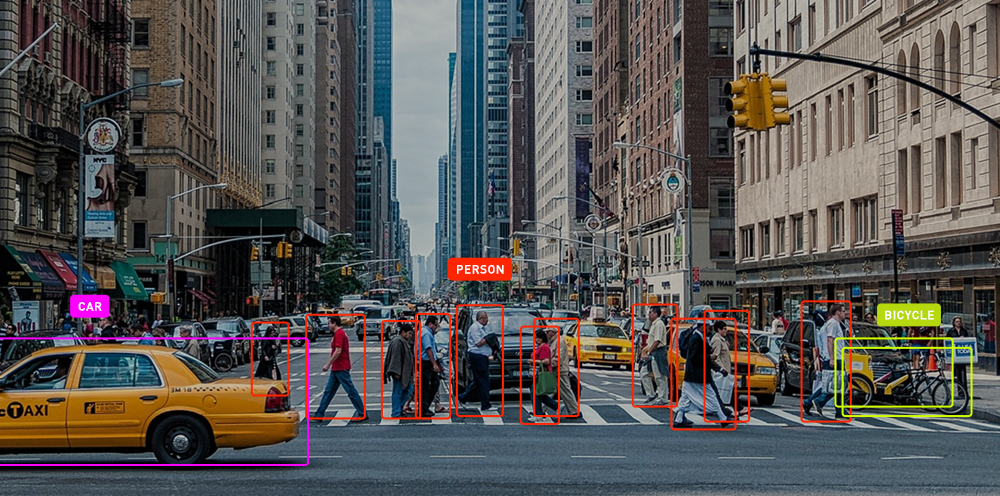
    
* 이미지 생성: 실제와 비슷한 이미지를 생성하는 문제입니다. (실제 인공지능이 생성한 사람의 얼굴입니다.)

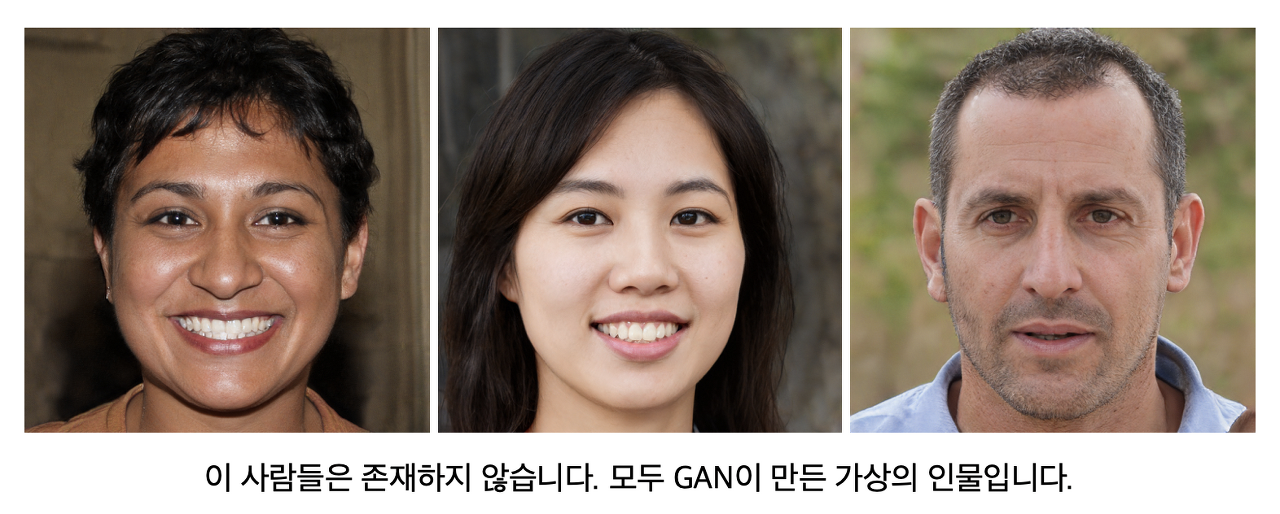